In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline

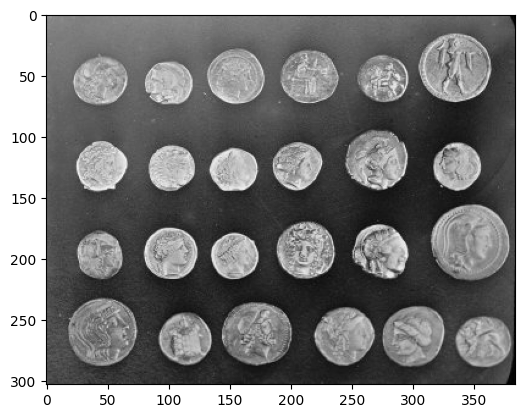

In [130]:
coins = data.coins()
plt.imshow(coins,cmap='gray')

# Segmentação baseada em limiarização

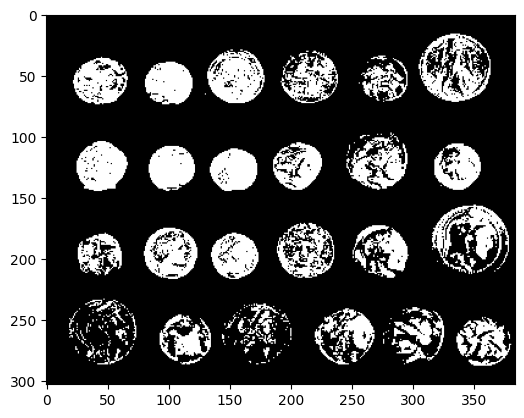

In [132]:
threshold = 150
coins_threshold = coins > threshold
plt.imshow(coins_threshold,cmap='gray')

# Preenchendo as regiões

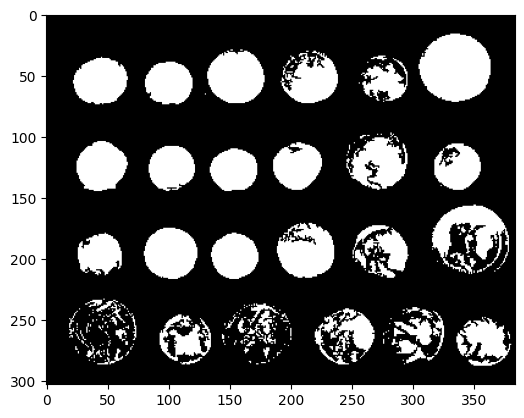

In [133]:
from scipy import ndimage as ndi
# binary_fill_holes, binary_propagation, binary_dilation
fill_coins = ndi.binary_fill_holes(coins_threshold) # Preenche os buracos de regiões fechadas de imagens binárias
plt.imshow(fill_coins,cmap='gray')

# Remoção de pequenas regiões

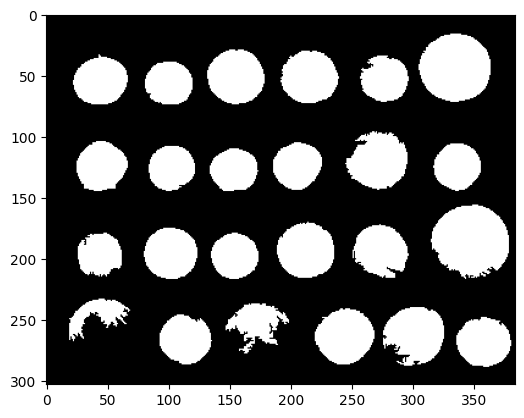

In [125]:
number_of_pixels = 300 #As regioes que tiverem menos de 300 pixels serão removidas
label_objects, nb_labels = ndi.label(fill_coins) #Criando labels com as diferentes regiões da imagem
new_image = np.zeros((label_objects.shape[0],label_objects.shape[1])) #Criando a nova imagem que receberá o resultado
for i in range(1,nb_labels):
    quant = np.sum(label_objects[:] == i) #Calculando o número de pixels da região de label i
    if(quant > number_of_pixels): #Fazendo a limiarização para remover as regiões com menos pixels que a variável
        new_image[label_objects[:] == i] = 1 #Os pixels da nova imagem receberão valor 1 nas posições que a região possui label igual a i
plt.imshow(new_image,cmap='gray')

# Metodos que calculam automaticamente um valor de threshold

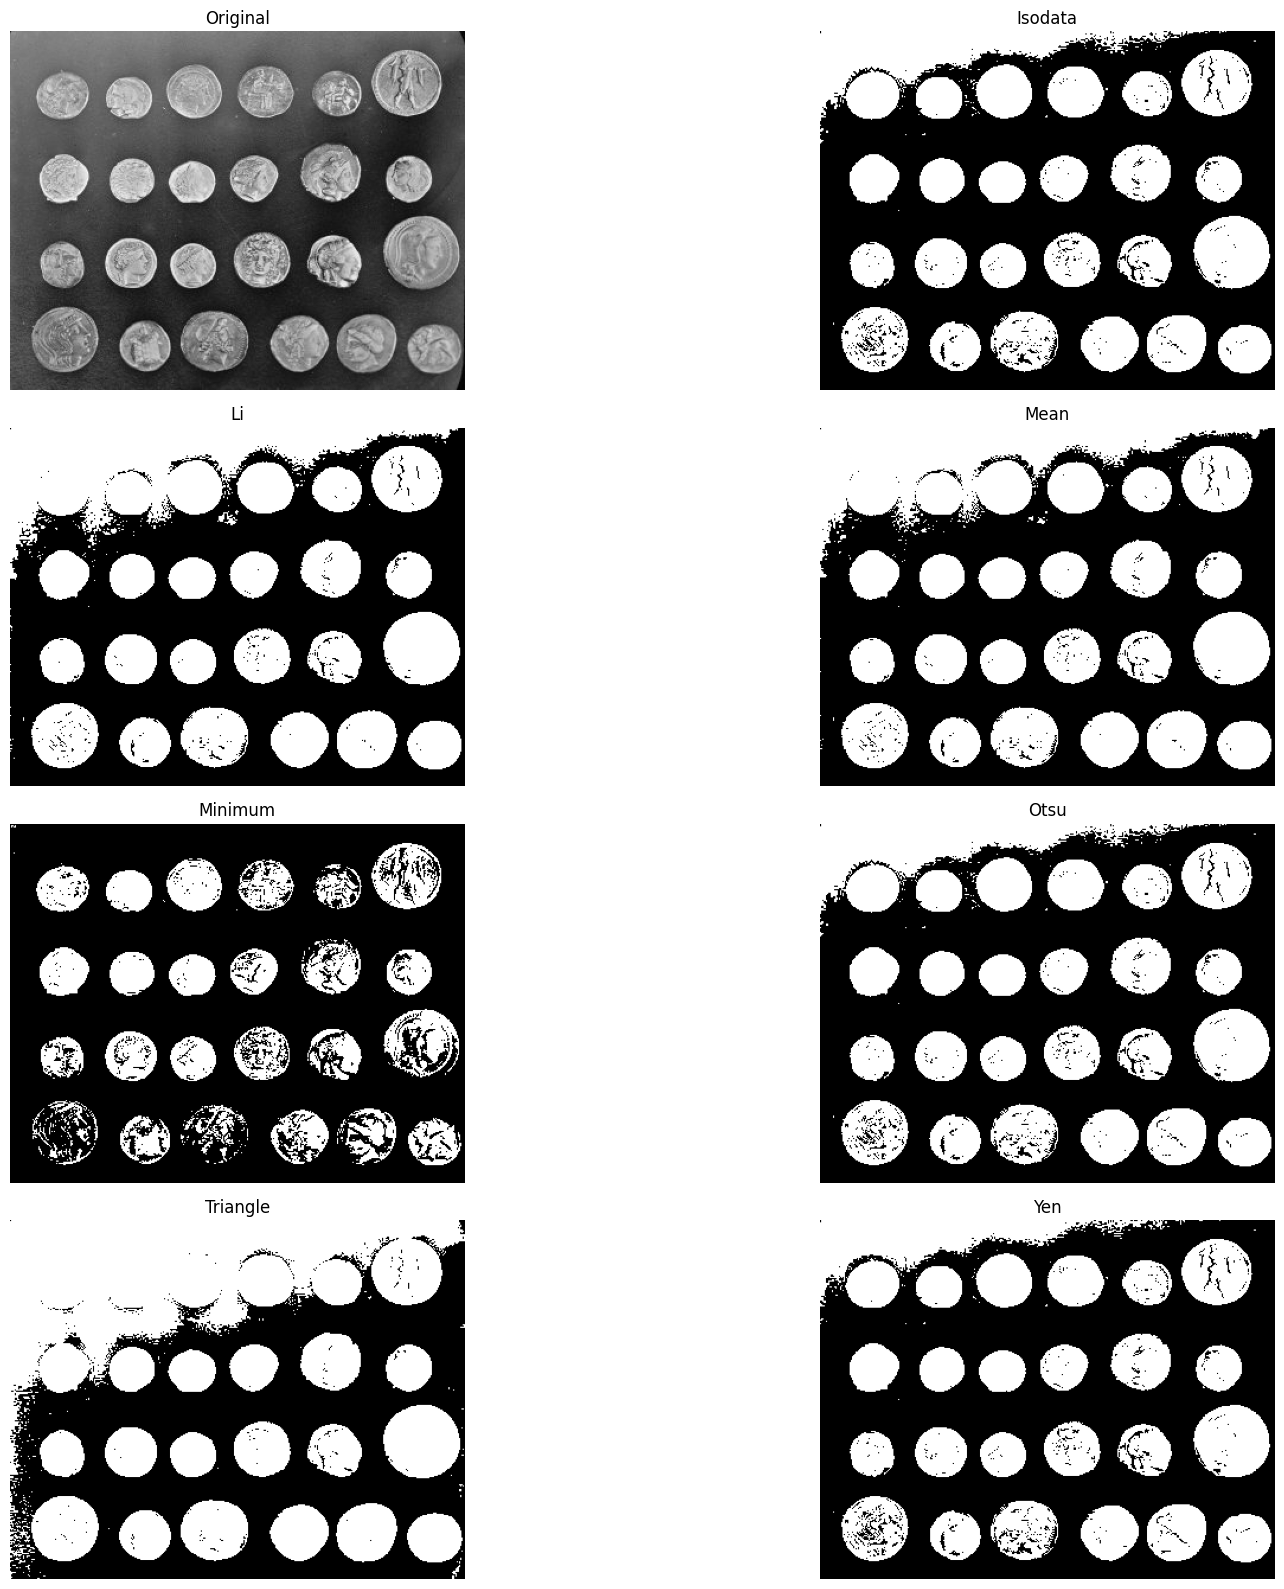

In [6]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(coins, figsize=(20, 16), verbose=False)
plt.show()